<a href="https://colab.research.google.com/github/Sanjayshrinivas/Time-Series-Assignment-127177025/blob/main/Time_Series_Assignment_127177025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter value of q: 4
Calculated Trend: [  0.       0.       0.       0.     131.875  133.4375 131.75   129.3125
 128.25   127.3125 126.3125 125.0625 123.5625 124.75   130.75   138.125
 144.0625 147.1875 145.9375 144.5625   0.       0.       0.       0.    ]
Extracted Seasonality: [-4.44791667 -3.10416667  1.38541667  6.16666667 -4.44791667 -3.10416667
  1.38541667  6.16666667 -4.44791667 -3.10416667  1.38541667  6.16666667
 -4.44791667 -3.10416667  1.38541667  6.16666667 -4.44791667 -3.10416667
  1.38541667  6.16666667 -4.44791667 -3.10416667  1.38541667  6.16666667]


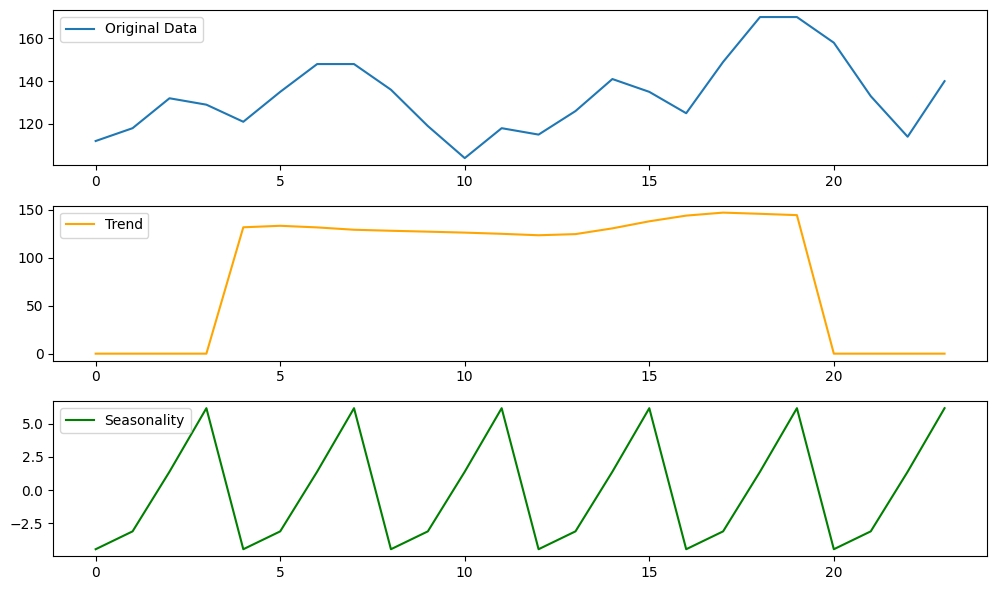

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Enter TS DATA
time_series = np.array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140])

q = int(input("Enter value of q: "))

n = len(time_series)
Tline = np.zeros(n)

#Calc Mk values
#Odd
if len(time_series) % 2 == 1:
    for i in range(q, n - q):
        Tline[i] = np.mean(time_series[i - q:i + q + 1])
#Even
else:
    d = 2 * q
    for i in range(q, n - q):
        Tline[i] = (0.5 * time_series[i - q] + np.sum(time_series[i - q + 1:i + q]) + 0.5 * time_series[i + q]) / d


seasonal_effect = np.zeros(n)
for i in range(n):
    sum_diff = 0
    count = 0
    for j in range(-(n // q), n // q):
        if 0 <= i + j * q < n:
            sum_diff += time_series[i + j * q] - Tline[i + j * q]
            count += 1
    if count > 0:
        seasonal_effect[i] = sum_diff / count

avg_seasonality = np.mean(seasonal_effect)
adjusted_seasonal = seasonal_effect - avg_seasonality

print("Calculated Trend:", Tline)
print("Extracted Seasonality:", adjusted_seasonal)

plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.plot(time_series, label="Original Data")
plt.legend(loc='upper left')

plt.subplot(312)
plt.plot(Tline, label="Trend", color='orange')
plt.legend(loc='upper left')

plt.subplot(313)
plt.plot(adjusted_seasonal, label="Seasonality", color='green')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()